In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [433]:
df_wsb = pd.read_csv('./csv_files/wsb_data.csv')
df_wsb_test = pd.read_csv('./csv_files/wsb_data_test.csv')
df_sm = pd.read_csv('./csv_files/sm_data.csv')
df_sm_test = pd.read_csv('./csv_files/sm_data_test.csv')

In [434]:
df = pd.concat([df_wsb,df_sm], axis = 0)
df_test = pd.concat([df_wsb_test,df_sm_test],axis = 0)

In [435]:
df.drop(columns='Unnamed: 0',inplace= True)
df_test.drop(columns='Unnamed: 0',inplace= True)

In [436]:
df.isnull().sum()

subreddit         0
selftext       4645
title             0
created_utc       0
dtype: int64

In [437]:
df_test.isnull().sum()

subreddit        0
selftext       376
title            0
created_utc      0
dtype: int64

In [438]:
df.fillna('',inplace = True)
df_test.fillna('',inplace = True)

In [439]:
df['subreddit'].value_counts()

wallstreetbets    4000
StockMarket       4000
Name: subreddit, dtype: int64

In [440]:
df['subreddit'] = df['subreddit'].map({'wallstreetbets': 1, 'StockMarket': 0 })
df_test['subreddit'] = df_test['subreddit'].map({'wallstreetbets': 1, 'StockMarket': 0 })

In [441]:
df['subreddit'].value_counts()

1    4000
0    4000
Name: subreddit, dtype: int64

In [442]:
X= df['title']
y = df['subreddit']



In [443]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [444]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 42)

# EDA

In [445]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(X_train)
X_train = cvec.transform(X_train)
train_df = pd.DataFrame(X_train.todense(),columns = cvec.get_feature_names_out())
train_df['subreddit'] = y_train.values


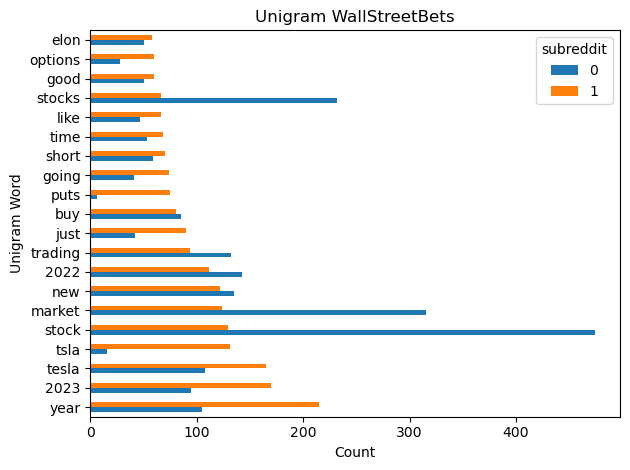

In [446]:
train_df.groupby('subreddit').sum().T.sort_values(1,ascending= False).head(20).plot.barh()
plt.title('Unigram WallStreetBets')
plt.xlabel('Count')
plt.ylabel('Unigram Word')
plt.tight_layout()
plt.savefig('./images/UnigramWsb')


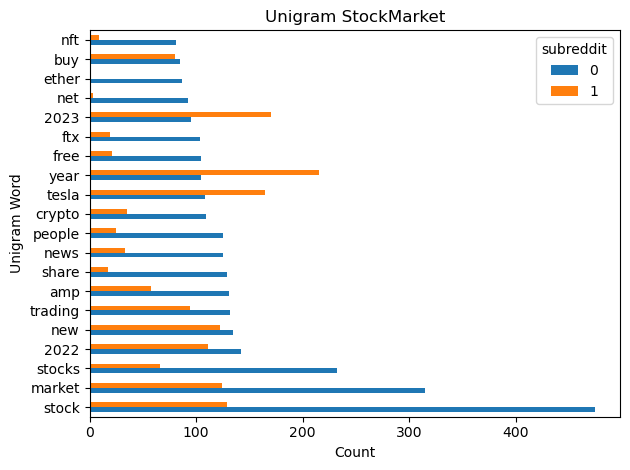

In [447]:
train_df.groupby('subreddit').sum().T.sort_values(0,ascending= False).head(20).plot.barh()
plt.title('Unigram StockMarket')
plt.xlabel('Count')
plt.ylabel('Unigram Word')
plt.tight_layout()
plt.savefig('./images/UnigramStockMarket')

In [448]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 42)
cvec = CountVectorizer(ngram_range=(2,2))
cvec.fit(X_train)
X_train = cvec.transform(X_train)
train_df_bi = pd.DataFrame(X_train.todense(),columns = cvec.get_feature_names_out())
train_df_bi['subreddit'] = y_train.values


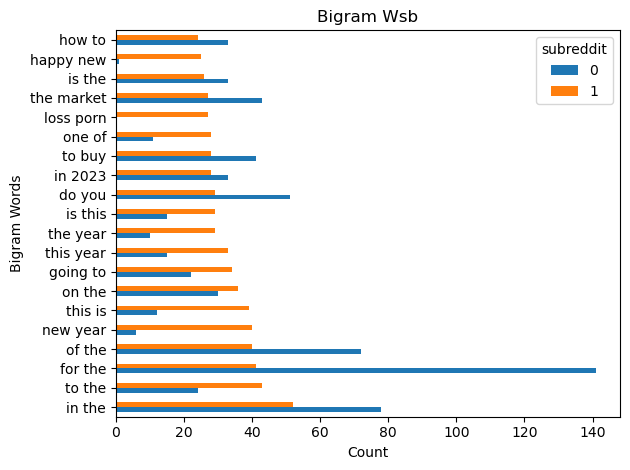

In [449]:
train_df_bi.groupby('subreddit').sum().T.sort_values(1,ascending= False).head(20).plot.barh()
plt.title('Bigram Wsb')
plt.xlabel('Count')
plt.ylabel('Bigram Words')
plt.tight_layout()
plt.savefig('./images/BigramWsb')

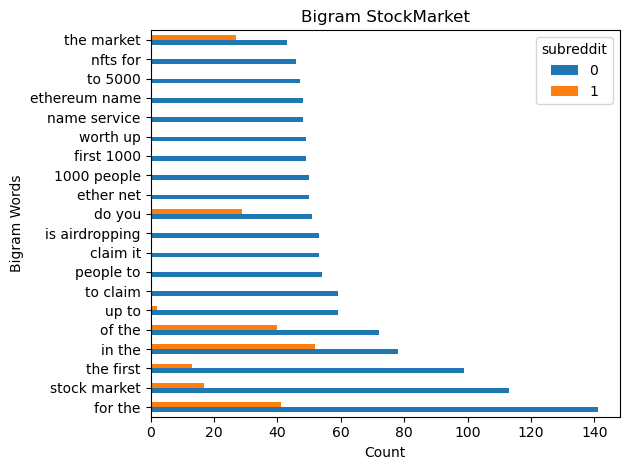

In [450]:
train_df_bi.groupby('subreddit').sum().T.sort_values(0,ascending = False).head(20).plot.barh()
plt.title('Bigram StockMarket')
plt.xlabel('Count')
plt.ylabel('Bigram Words')
plt.tight_layout()
plt.savefig('./images/BigramStockMarket')

In [451]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 42)
cvec = CountVectorizer(ngram_range=(3,3))
cvec.fit(X_train)
X_train = cvec.transform(X_train)
train_df_tri = pd.DataFrame(X_train.todense(),columns = cvec.get_feature_names_out())
train_df_tri['subreddit'] = y_train.values

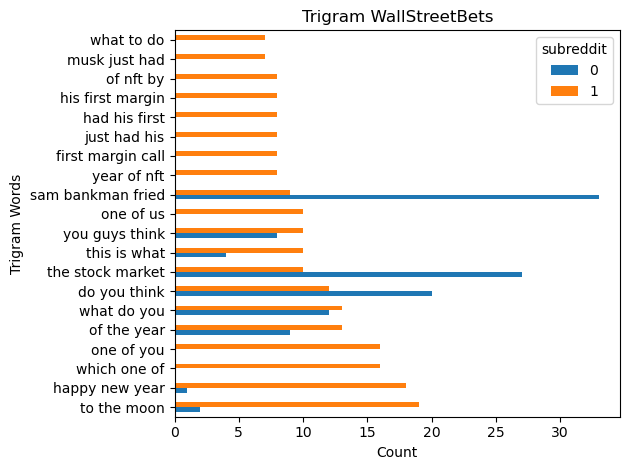

In [452]:
train_df_tri.groupby('subreddit').sum().T.sort_values(1,ascending= False).head(20).plot.barh()
plt.title('Trigram WallStreetBets')
plt.xlabel('Count')
plt.ylabel('Trigram Words')
plt.tight_layout()
plt.savefig('./images/TrigramWsb')

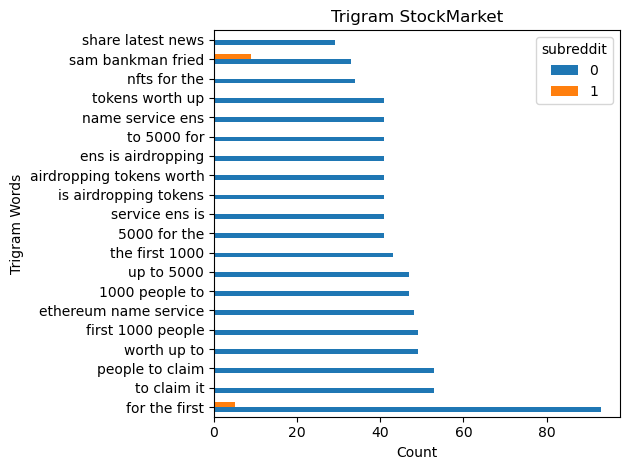

In [453]:
train_df_tri.groupby('subreddit').sum().T.sort_values(0,ascending= False).head(20).plot.barh()
plt.title('Trigram StockMarket')
plt.xlabel('Count')
plt.ylabel('Trigram Words')
plt.tight_layout()
plt.savefig('./images/TrigramStockMarket')